In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Car_Data.csv")
df.head()

,Unnamed: 0,Price,Year,Kilo Meter,Brand,Model,Place
0,0,"2,20,000",2010.0,"55,000",Hyundai,Hyundai i10,Durga Sarovar
1,1,"10,75,000",2019.0,"30,797",Toyota,Toyota Yaris,Yelahanka
2,2,"2,80,000",2018.0,"14,000",Maruti,Maruti Suzuki Alto 800,Lalita Park
3,3,"90,000",2009.0,"90,000",Maruti,Maruti Suzuki Alto,Sector 23A
4,4,"1,10,000",2008.0,"70,000",Maruti,Maruti Suzuki Alto,Guru Teg Bahadur Nagar


In [3]:
df.columns

Index(['Unnamed: 0', 'Price', 'Year', 'Kilo Meter', 'Brand', 'Model', 'Place'], dtype='object')

In [4]:
df.dtypes

Unnamed: 0      int64
Price          object
Year          float64
Kilo Meter     object
Brand          object
Model          object
Place          object
dtype: object

In [5]:
df.isnull().sum()

Unnamed: 0    0
Price         0
Year          0
Kilo Meter    0
Brand         0
Model         0
Place         0
dtype: int64

# Visualization

Maruti           124
Hyundai           67
Honda             57
Toyota            41
Mahindra          30
BMW               26
Volkswagen        21
Mercedes-Benz     19
Ford              17
Tata              15
Renault           12
Skoda             12
Audi              10
Chevrolet         10
Nissan             7
Land               4
Jaguar             3
Fiat               3
Jeep               3
Kia                3
Dc                 1
Porsche            1
Volvo              1
Hummer             1
Cadillac           1
Other              1
MG                 1
Ssangyong          1
Mitsubishi         1
Name: Brand, dtype: int64


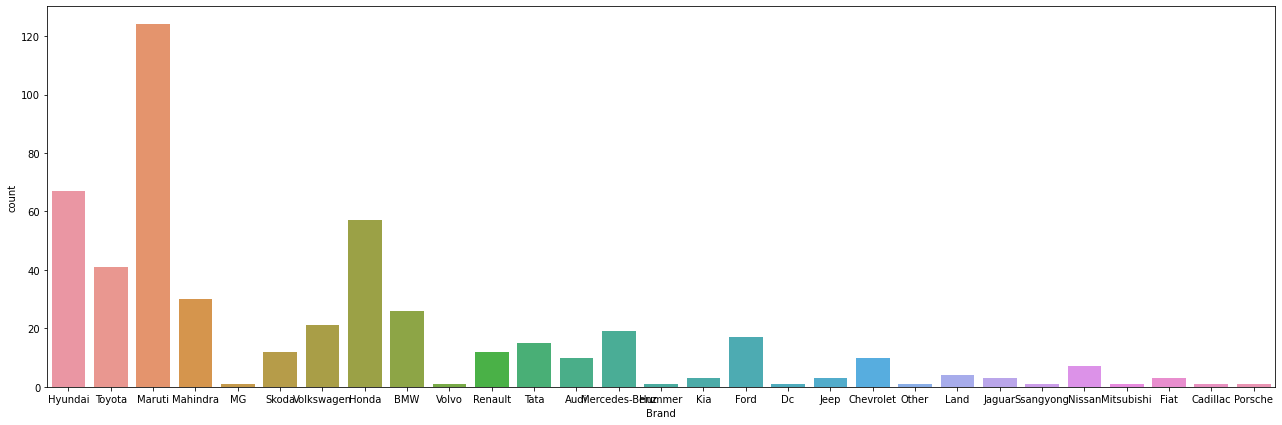

In [7]:
plt.figure(figsize=(22,7))
ax = sn.countplot(x="Brand", data=df)
print(df["Brand"].value_counts())

Honda City                   23
Maruti Suzuki Swift          18
Maruti Suzuki Wagon R        18
Toyota Innova Crysta         13
Maruti Suzuki Swift Dzire    12
                             ..
Land Rover Freelander 2       1
Maruti Suzuki XL6             1
Jaguar F Type                 1
Ford Ikon                     1
Hummer H3                     1
Name: Model, Length: 155, dtype: int64


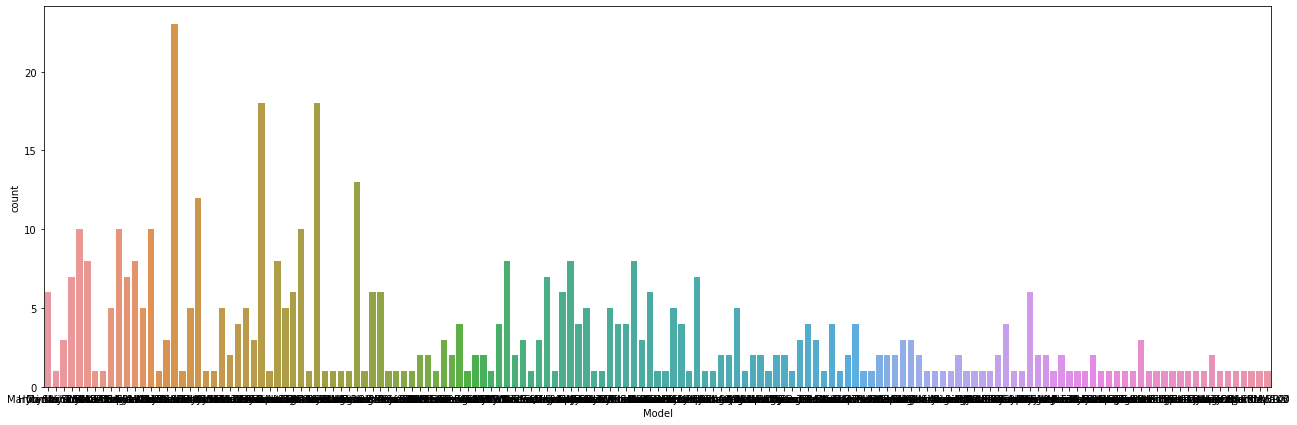

In [8]:
plt.figure(figsize=(22,7))
ax = sn.countplot(x="Model", data=df)
print(df["Model"].value_counts())

In [6]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lb.fit_transform(df[i].values.reshape(-1,1))

{'bodies': [<matplotlib.collections.PolyCollection at 0x1371ff11f70>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1371ff11d90>,
 'cmins': <matplotlib.collections.LineCollection at 0x1371ff24460>,
 'cbars': <matplotlib.collections.LineCollection at 0x1371ff24760>}

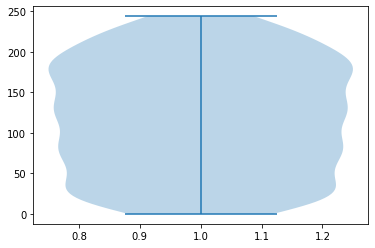

In [12]:
plt.violinplot(df['Price'])

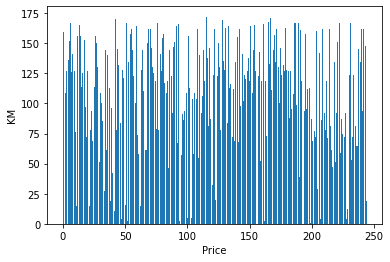

In [22]:
plt.xlabel('Price')
plt.ylabel('KM')
plt.bar(df['Price'],df['Kilo Meter'])
plt.show()

In [13]:
df.describe()

,Unnamed: 0,Price,Year,Kilo Meter,Brand,Model,Place
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,246.000000,119.239351,2013.979716,93.892495,14.002028,75.425963,137.391481
std,142.461106,68.480455,4.060968,46.905746,7.545391,43.470964,80.902398
min,0.000000,0.000000,1995.000000,0.000000,0.000000,0.000000,0.000000
25%,123.000000,63.000000,2012.000000,61.000000,7.000000,36.000000,59.000000
50%,246.000000,122.000000,2014.000000,99.000000,16.000000,78.000000,136.000000
75%,369.000000,179.000000,2017.000000,128.000000,17.000000,105.000000,214.000000
max,492.000000,244.000000,2021.000000,172.000000,28.000000,154.000000,273.000000


In [14]:
df.corr()

,Unnamed: 0,Price,Year,Kilo Meter,Brand,Model,Place
Unnamed: 0,1.000000,0.025376,0.070353,0.093035,0.034937,0.036332,0.086652
Price,0.025376,1.000000,0.187324,-0.021393,0.039988,0.039984,0.088037
Year,0.070353,0.187324,1.000000,-0.177556,0.091672,0.086895,0.066547
Kilo Meter,0.093035,-0.021393,-0.177556,1.000000,-0.021822,-0.013191,-0.024226
Brand,0.034937,0.039988,0.091672,-0.021822,1.000000,0.988096,0.010241
Model,0.036332,0.039984,0.086895,-0.013191,0.988096,1.000000,-0.016996
Place,0.086652,0.088037,0.066547,-0.024226,0.010241,-0.016996,1.000000


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
df


,Price,Year,Kilo Meter,Brand,Model,Place
0,71,2010.0,99,9,51,66
1,27,2019.0,63,26,148,270
2,86,2018.0,24,16,79,133
3,242,2009.0,162,16,78,223
4,3,2008.0,127,16,78,84
...,...,...,...,...,...,...
488,78,2011.0,141,16,98,179
489,116,2014.0,112,9,52,179
490,94,2014.0,2,1,10,209
491,189,2016.0,167,9,43,179


<AxesSubplot:>

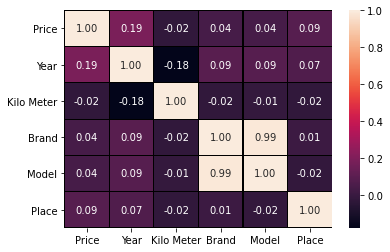

In [18]:

sn.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [10]:
x=df.iloc[:,1:6]
x.head()

,Year,Kilo Meter,Brand,Model,Place
0,2010.0,99,9,51,66
1,2019.0,63,26,148,270
2,2018.0,24,16,79,133
3,2009.0,162,16,78,223
4,2008.0,127,16,78,84


In [11]:
y=df.iloc[:,0]
y.head()

0     71
1     27
2     86
3    242
4      3
Name: Price, dtype: int32

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=66)

In [13]:
x_train.shape

(330, 5)

In [14]:
y_train.shape

(330,)

In [15]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.018404907975460124
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00   

In [16]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.012269938650306749
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00   

In [17]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.024539877300613498
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.33      0.50      0.40         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00   

In [18]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.024539877300613498
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          36       0.00      0.00      0.00   

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.02232529375386518


In [21]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.036569779426922286


In [22]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.05281385281385283


In [23]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.02638631210059782


# Hyper parameter

In [39]:
parameter = {'n_estimators':[100,200, 400, 600, 800, 1000],'max_depth': [10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [3, 4, 5,6],'max_features':['auto', 'sqrt']}

In [40]:
from sklearn.model_selection import GridSearchCV
GV=GridSearchCV(rf,parameter,cv=5)

In [ ]:
GV.fit(x_train,y_train)

In [ ]:
GV.best_params_

In [24]:
rf=RandomForestClassifier(n_estimators=800,max_depth=30,criterion='gini',min_samples_split=5,min_samples_leaf=4,max_features='auto')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.03067484662576687
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.25      0.50      0.33         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00    

In [25]:
import pickle
filename = 'Car_price.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [26]:
loaded_model = pickle.load(open('Car_price.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.03067484662576687
